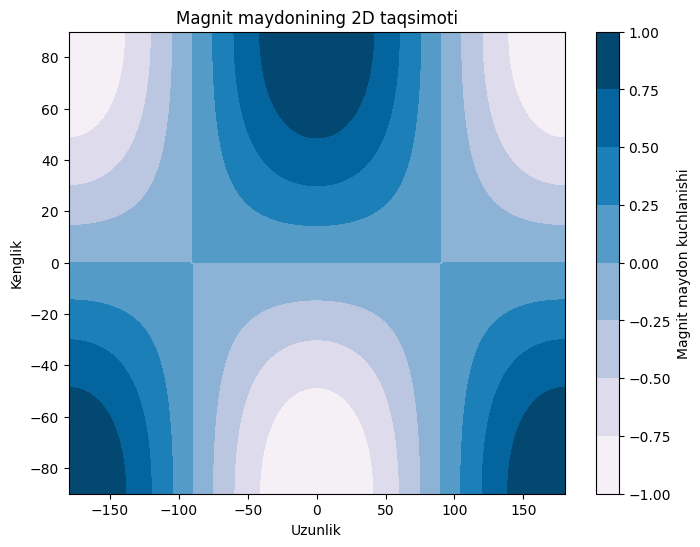

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Kenglik va uzunlik bo'yicha ma'lumotlar
lat = np.linspace(-90, 90, 100)  # Kenglik
lon = np.linspace(-180, 180, 100)  # Uzunlik
lat, lon = np.meshgrid(lat, lon)

# Sun'iy magnit anomaliyasining kuchlanishini hisoblash
# Masalan, sinusoidal taqsimot
magnetic_field = np.sin(np.radians(lat)) * np.cos(np.radians(lon))

# Natijani ko'rsatish
plt.figure(figsize=(8, 6))
plt.contourf(lon, lat, magnetic_field, cmap='PuBu')
plt.colorbar(label='Magnit maydon kuchlanishi')
plt.xlabel('Uzunlik')
plt.ylabel('Kenglik')
plt.title('Magnit maydonining 2D taqsimoti')
plt.show()




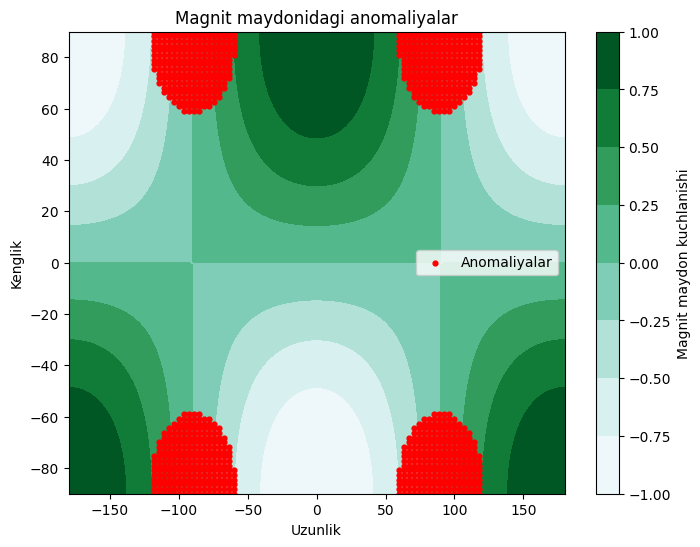

In [7]:


# Magnit maydonining gradientini hisoblash (x va y yo'nalishlari bo'yicha)
grad_x, grad_y = np.gradient(magnetic_field)

# Gradientning kattaligini hisoblash
grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)

# Anomaliya joylarini ko'rsatish uchun yuqori gradientli joylarni tanlash
anomaliyalari = grad_magnitude > np.percentile(grad_magnitude, 90)  # Eng katta gradientlar

# Anomaliyalar tasvirini ko'rsatish
plt.figure(figsize=(8, 6))
plt.contourf(lon, lat, magnetic_field, cmap='BuGn')
plt.colorbar(label='Magnit maydon kuchlanishi')

# Anomaliyalari (yuqori gradientli joylar) ustiga nuqtalarni qo‘shish
plt.scatter(lon[anomaliyalari], lat[anomaliyalari], color='red', s=12, label='Anomaliyalar')
plt.xlabel('Uzunlik')
plt.ylabel('Kenglik')
plt.title('Magnit maydonidagi anomaliyalar')
plt.legend()
plt.show()


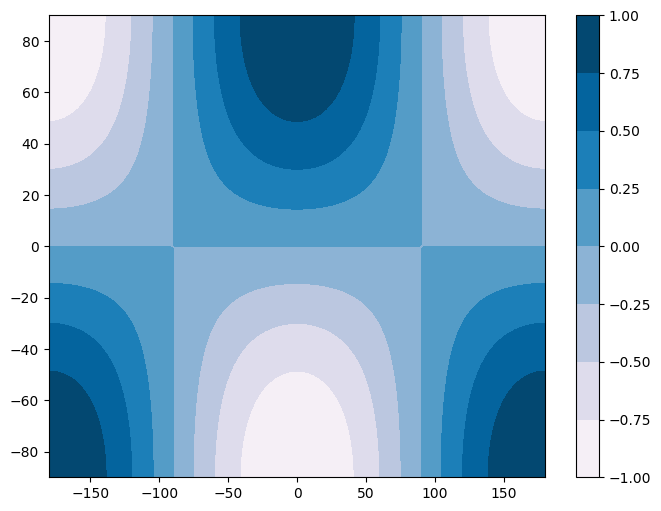

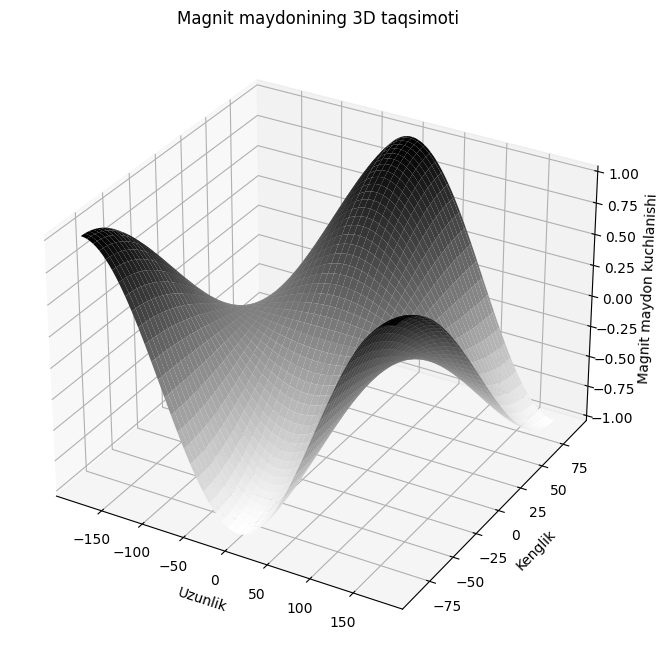

In [6]:
import matplotlib.animation as animation

# Animatsiya uchun yangilanish funksiyasi
def update(frame):
    # Magnit maydonini vaqtga bog‘liq ravishda o‘zgartirish (masalan, sinusoidal o‘zgarish)
    magnetic_field = np.sin(np.radians(lat + frame)) * np.cos(np.radians(lon))
    
    # Ekrandagi eski tasvirni o‘chirish
    for c in im.collections:
        c.remove()
    
    # Yangi tasvirni chizish
    im = ax.contourf(lon, lat, magnetic_field, cmap='jet')
    return im.collections

# Animatsiya yaratish
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.contourf(lon, lat, magnetic_field, cmap='PuBu')
plt.colorbar(im)

ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 100), interval=50)
plt.show()


from mpl_toolkits.mplot3d import Axes3D

# 3D grafikni yaratish
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D yuzani chizish
ax.plot_surface(lon, lat, magnetic_field, cmap='binary', edgecolor='none')

# Oqil (color) va o'qlarni belgilash
ax.set_xlabel('Uzunlik')
ax.set_ylabel('Kenglik')
ax.set_zlabel('Magnit maydon kuchlanishi')
ax.set_title('Magnit maydonining 3D taqsimoti')

plt.show()
